In [29]:
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import requests

import matplotlib.dates as mdates
weeks = mdates.DayLocator(interval=7)
months = mdates.MonthLocator()
months_fmt = mdates.DateFormatter('%b')

In [3]:
url = 'https://covidtracking.com/api/v1/states/daily.json'
r = requests.get(url=url) 
data = r.json()

In [4]:
data

[{'date': 20200720,
  'state': 'AK',
  'positive': 2414,
  'negative': 173172,
  'pending': None,
  'hospitalizedCurrently': 29,
  'hospitalizedCumulative': None,
  'inIcuCurrently': None,
  'inIcuCumulative': None,
  'onVentilatorCurrently': 0,
  'onVentilatorCumulative': None,
  'recovered': 712,
  'dataQualityGrade': 'A',
  'lastUpdateEt': '7/20/2020 00:00',
  'dateModified': '2020-07-20T00:00:00Z',
  'checkTimeEt': '07/19 20:00',
  'death': 18,
  'hospitalized': None,
  'dateChecked': '2020-07-20T00:00:00Z',
  'totalTestsViral': 175586,
  'positiveTestsViral': None,
  'negativeTestsViral': None,
  'positiveCasesViral': 2414,
  'deathConfirmed': 18,
  'deathProbable': None,
  'fips': '02',
  'positiveIncrease': 137,
  'negativeIncrease': 2439,
  'total': 175586,
  'totalTestResults': 175586,
  'totalTestResultsIncrease': 2576,
  'posNeg': 175586,
  'deathIncrease': 0,
  'hospitalizedIncrease': 0,
  'hash': '982ac1a1537b9b7a5d2dd768e419cece11dfe669',
  'commercialScore': 0,
  'negati

In [9]:
df = pd.DataFrame.from_dict(data)

In [10]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200720,AK,2414.0,173172.0,NaN,29.0,NaN,NaN,NaN,0.0,...,175586,0,0,982ac1a1537b9b7a5d2dd768e419cece11dfe669,0,0,0,0,0,
1,20200720,AL,68891.0,524897.0,NaN,1563.0,8368.0,NaN,994.0,NaN,...,593788,4,586,78b0f0cdb400a84b5052f80e597bc11138f5848d,0,0,0,0,0,
2,20200720,AR,33927.0,398889.0,NaN,471.0,2202.0,NaN,NaN,111.0,...,432816,0,25,3bb85a05440526c23d60b70ad3388d236332589c,0,0,0,0,0,
3,20200720,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,eb1949a094a8c4c95f33a9c6db8d407e917f5bdb,0,0,0,0,0,
4,20200720,AZ,145183.0,648340.0,NaN,3084.0,6698.0,886.0,NaN,622.0,...,793523,23,66,181888e74b302a4e4e3e90a0771e139657f9f0fe,0,0,0,0,0,


In [31]:
df['datetime'] = [datetime.strptime(str(x), '%Y%m%d') for x in df['date']]
df['positivity'] = df['positive'] / (df['positive'] + df['negative']) * 100

In [32]:
dat = df[df['state'] == 'NY']
dat

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,positivity,datetime
37,20200720,NY,407326.0,4757486.0,NaN,716.0,89995.0,158.0,NaN,93.0,...,0,6a23ba7c888ceb65d6ab223b83dbbd4dcf1783a9,0,0,0,0,0,,7.886560,2020-07-20
93,20200719,NY,406807.0,4708663.0,NaN,722.0,89995.0,160.0,NaN,96.0,...,0,f5135cc3e99c0f6e2231509ab89c7814c66e35fa,0,0,0,0,0,,7.952485,2020-07-19
149,20200718,NY,406305.0,4662961.0,NaN,743.0,89995.0,172.0,NaN,100.0,...,0,8d535ed9b5bae768a02d4c0689a134e3154936c5,0,0,0,0,0,,8.015066,2020-07-18
205,20200717,NY,405551.0,4593898.0,NaN,765.0,89995.0,179.0,NaN,98.0,...,0,93be3084132a637e27a0b5aa58c719d4cca41c4a,0,0,0,0,0,,8.111914,2020-07-17
261,20200716,NY,404775.0,4516435.0,NaN,813.0,89995.0,165.0,NaN,88.0,...,0,9786472ba197a40425272e3db3407b63d877c569,0,0,0,0,0,,8.225111,2020-07-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7499,20200308,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,fa2a693c8e7c1123ce6741af19746db86f9d8fce,0,0,0,0,0,,53.299492,2020-03-08
7549,20200307,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,...,0,0fc0bcee0b931ade7d5379ba6ea1bbcbac513630,0,0,0,0,0,,45.238095,2020-03-07
7589,20200306,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,...,0,6f6a5ab226e7632b2d5bda9d6acc6cbe9e29cd7e,0,0,0,0,0,,26.400000,2020-03-06
7616,20200305,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,...,0,24af0f3d698331d8a3896c0f921342be3b0817c0,0,0,0,0,0,,22.448980,2020-03-05


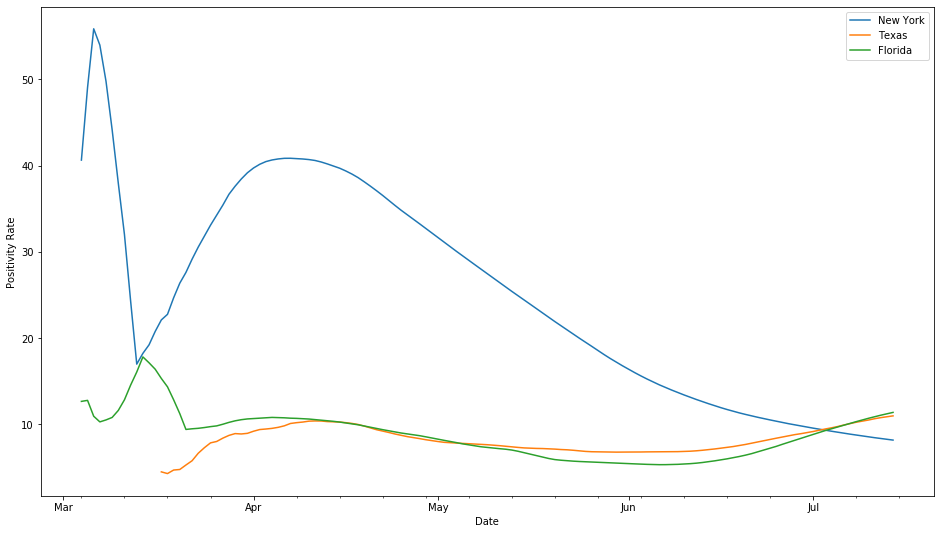

In [37]:
ny = df[df['state'] == 'NY']
tx = df[df['state'] == 'TX']
fl = df[df['state'] == 'FL']
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(ny['datetime'], ny['positivity'].rolling(7).mean(), label='New York')
ax.plot(tx['datetime'], tx['positivity'].rolling(7).mean(), label='Texas')
ax.plot(fl['datetime'], fl['positivity'].rolling(7).mean(), label='Florida')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(weeks)
ax.set_xlabel('Date')
ax.set_ylabel('Positivity Rate')
ax.legend()
plt.show()